In [1]:
import pandas as pd
import os, glob
import datetime
import numpy as np
import csv

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.2)

В России в середине 2010-х годов произошёл кратный рост дел по 134 статье УК "Половое сношение и иные действия сексуального характера с лицом, не достигшим шестнадцатилетнего возраста". Количество дел с нескольких десятков в год выросло до несколько тысяч всего за два года. Это косвенно указывает на неестественный характер этого роста. Известно, что в некоторых случаях такие дела имеют политическую подоплеку - то есть заводятся для сведения счета с оппонентами.

In [2]:
dostoevsky_data = pd.read_csv(r'Полный датасет.csv', index_col=0) # encoding = 'utf-16', delimiter='\t'

In [3]:
dostoevsky_data.head()

,Год,Статья,Название,Всего осуждено,Пожизненное лишение свободы,Лишение свободы,Условное осуждение к лишению свободы,Арест,Ограничение свободы,"Ограничение свободы/ограничение по военной службе, содержание в дисциплинарной воинской части",...,Доп. квалификация: прекращено по иным основаниям по количеству составов преступлений,Доп. квалификация: признано невменяемыми по числу лиц,Доп. квалификация: признано невменяемыми по количеству составов преступлений,Освобождено от наказания по другим основаниям/от лишения свободы,Освобождено от наказания по другим основаниям/от иных мер,Освобождено от наказания по амнисти/от лишения свободы,Освобождено от наказания по амнистии/от иных мер,"Освобождено от наказания в связи с зачетом срока содержания под стражей, домашнего ареста/от лишения свободы","Освобождено от наказания в связи с зачетом срока содержания под стражей, домашнего ареста/от иных мер",Принудительные меры медицинского характера в отношении невменяемого дополнительная квалификация по судебным постановлениям по количеству составов преступлений
1,2010,132ч.3,Те же деяния при особо отягчающих обстоятельствах,431,0,404,27,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010,132ч.4,"Деяния, предусмотренные частями первой или вто...",340,0,318,22,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,132ч.3,Те же деяния при особо отягчающих обстоятельствах,253,0,235,17,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,132ч.4,"Деяния, предусмотренные частями первой или вто...",545,0,522,22,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012,132ч.3,Те же деяния при особо отягчающих обстоятельствах,131,0,127,4,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для анализа будем использовать данные с `beta.dostoevsky.io` на котором есть статистика судебных решений на основе публикаций Судебного департамента при Верховном Суде РФ.

Какие в датасете есть данные:
* год
* статья и название статьи
* сколько всего осуждено людей по данной статье за год
* какое наказание назначил суд (лишение свободы, штраф, принудительные работы и т.д).

## "Педофильские статьи" уголовного кодекса
**131 УК РФ. Изнасилование**
* ч.3 - Изнасилование:
    * несовершеннолетней;
    * повлекшее по неосторожности причинение тяжкого вреда здоровью потерпевшей, заражение ее ВИЧ-инфекцией или иные тяжкие последствия
* ч.4 - Изнасилование:
    * повлекшее по неосторожности смерть потерпевшей;
    * потерпевшей, не достигшей четырнадцатилетнего возраста
* ч.5 - Деяния, предусмотренные пунктом "а" части третьей и пунктом "б" части четвертой настоящей статьи, если они:
    * совершены лицом, имеющим судимость за ранее совершенное преступление против половой неприкосновенности несовершеннолетнего;
    * совершены в отношении двух или более несовершеннолетних;
    * сопряжены с совершением другого тяжкого или особо тяжкого преступления против личности, за исключением случаев, предусмотренных пунктом "к" части второй статьи 105 настоящего Кодекса
    
**132 УК РФ. Насильственные действия сексуального характера**
* ч.3 - Мужеложство, лесбиянство или иные действия сексуального характера с применением насилия или с угрозой его применения к потерпевшему (потерпевшей) или к другим лицам либо с использованием беспомощного состояния потерпевшего (потерпевшей), если они совершены в отношении несовершеннолетнего (несовершеннолетней);
* ч.4 - Деяния, предусмотренные частями первой или второй настоящей статьи, если они: повлекли по неосторожности смерть потерпевшего (потерпевшей), совершены в отношении лица, не достигшего четырнадцатилетнего возраста
* ч.5 - Деяния, предусмотренные пунктом "а" части третьей и пунктом "б" части четвертой настоящей статьи, если они: совершены лицом, имеющим судимость за ранее совершенное преступление против половой неприкосновенности несовершеннолетнего; совершены в отношении двух или более несовершеннолетних;

**133 УК РФ. Понуждение к действиям сексуального характера**
* ч.2 - Понуждение лица к половому сношению, мужеложству, лесбиянству или совершению иных действий сексуального характера путем шантажа, угрозы уничтожением, повреждением или изъятием имущества либо с использованием материальной или иной зависимости потерпевшего (потерпевшей), *совершенное в отношении несовершеннолетнего (несовершеннолетней)*

**134 УК. Половое сношение и иные действия сексуального характера с лицом, не достигшим шестнадцатилетнего возраста**
  * ч.1 - Половое сношение и иные действия сексуального характера с лицом, не достигшим шестнадцати лет 
  * ч.2 - Мужеложство или лесбиянство с лицом, не достигшим шестнадцатилетнего возраста, совершенные лицом, достигшим восемнадцатилетнего возраста
  * ч.3 - Деяния, предусмотренные частями первой или второй настоящей статьи, совершенные с лицом, достигшим двенадцатилетнего возраста, но не достигшим четырнадцатилетнего возраста
  * ч.4 - Деяния, предусмотренные частями первой, второй или третьей настоящей статьи, совершенные в отношении двух или более лиц
  * ч.5 - Деяния, предусмотренные частями первой, второй, третьей или четвертой настоящей статьи, совершенные группой лиц, группой лиц по предварительному сговору или организованной группой
  * ч.6 - Деяния, предусмотренные частью третьей настоящей статьи, совершенные лицом, имеющим судимость за ранее совершенное преступление против половой неприкосновенности несовершеннолетнего

**135 УК. Развратные действия**
  * ч.1 - Совершение развратных действий без применения насилия лицом, достигшим восемнадцатилетнего возраста, в отношении лица, заведомо не достигшего шестнадцатилетнего возраста (в старой редакции до ФЗ от 29.02.2012 № 14-ФЗ)
  * ч.2 - Совершение развратных действий без применения насилия лицом, достигшим восемнадцатилетнего возраста, совершенное в отношении лица, заведомо не достигшего четырнадцатилетнего возраста (в старой редакции до ФЗ от 29.02.2012 № 14-ФЗ)
  * ч.3 - Деяние, предусмотренное частью первой настоящей статьи, совершенное в отношении лица, заведомо не достигшего двенадцатилетнего возраста (в старой редакции до ФЗ от 29.02.2012 № 14-ФЗ)
  * ч.4 - Деяния, предусмотренные частями второй или третьей настоящей статьи, совершенные группой лиц по предварительному сговору или организованной группой (в старой редакции до ФЗ от 29.02.2012 № 14-ФЗ)
  * ч.5 - Деяние, предусмотренное частью второй, совершенное лицом, имеющим судимость за ранее совершенное преступление против половой неприкосновенности несовершеннолетнего (c редакции ФЗ от 29.02.2012 № 14-ФЗ)

**242.1 УК. Незаконные изготовление и оборот порнографических материалов или предметов**
  * ч.2 - Распространение, публичная демонстрация или рекламирование порнографических материалов или предметов среди несовершеннолетних либо вовлечение несовершеннолетнего в оборот порнографической продукции, совершенные лицом, достигшим восемнадцатилетнего возраста (c редакции ФЗ от 29.02.2012 № 14-ФЗ)
  
  
 **242.2 УК. Изготовление и оборот материалов или предметов с порнографическими изображениями несовершеннолетних**
* ч.1 - Фото-, кино- или видеосъемка несовершеннолетнего в целях изготовления и (или) распространения порнографических материалов или предметов либо привлечение несовершеннолетнего в качестве исполнителя для участия в зрелищном мероприятии порнографического характера, совершенные лицом, достигшим восемнадцатилетнего возраста, -

* ч.2 - Те же деяния, совершенные:
    * в отношении двух или более лиц;
    * группой лиц по предварительному сговору или организованной группой;
    * в отношении лица, не достигшего четырнадцатилетнего возраста;
    * с использованием информационно-телекоммуникационных сетей (включая сеть "Интернет"), -

Итоговый набор статей, которые есть в датасете

In [4]:
print(np.unique(dostoevsky_data['Статья']))

['131ч.3' '131ч.4' '131ч.5' '132ч.3' '132ч.4' '132ч.5' '133ч.2' '134ч.1'
 '134ч.2' '134ч.3' '134ч.4' '134ч.5' '134ч.6' '135ч.1' '135ч.2' '135ч.3'
 '135ч.4' '135ч.5' '242.1ч.2' '242.2ч.1' '242.2ч.2']


In [5]:
# визуализация статьи
def plot_article(article, kind='bar', total=False, figsize=(10,30)):
    plot_data = dostoevsky_data[dostoevsky_data['Статья'].str.contains(article)].groupby(['Год', 'Статья'])['Всего осуждено'].sum().unstack()
    
    if total is False:
        fig, ax =plt.subplots(nrows=len(plot_data.columns), ncols=1, figsize=figsize)
        if kind == 'bar':
            for n, col in enumerate(plot_data.columns):
                ax[n].bar(x=plot_data.index, height=plot_data[col])
                ax[n].set_title(col)
        elif kind == 'plot':
            for n, col in enumerate(plot_data.columns):
                ax[n].plot(plot_data[col])
                ax[n].set_title(col)
            
    if total:
        if kind == 'bar':
            plot_data.plot(kind='bar', figsize=(10,8))
        else:
            plot_data.plot(figsize=(10,8))

## Динамика приговоров по "педофильским статьям"

### Динамика приговоров по всем статьям

Как менялось количество приговоров по всем "педофильским" статьям с 2011 по 2020 год.

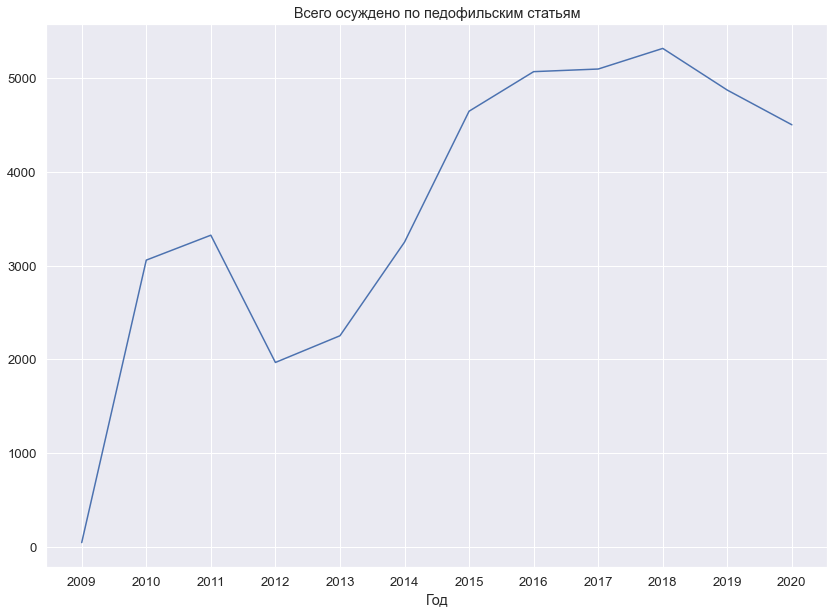

In [19]:
dostoevsky_data.groupby('Год')['Всего осуждено'].sum().plot(figsize=(14,10))
plt.title('Всего осуждено по педофильским статьям')
plt.xticks(np.unique(dostoevsky_data['Год']))
plt.show()

Рассмотрим динамику приговоров по каждой статье отдельно.

### 131 УК РФ. Изнасилование

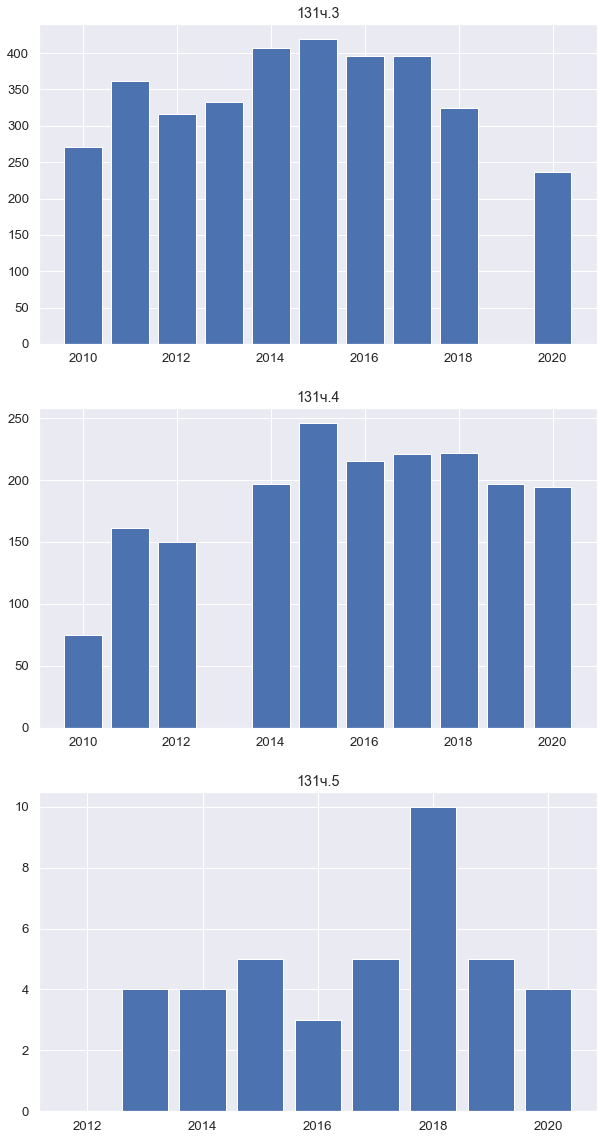

In [9]:
plot_article('131', kind='bar', figsize=(10,20))

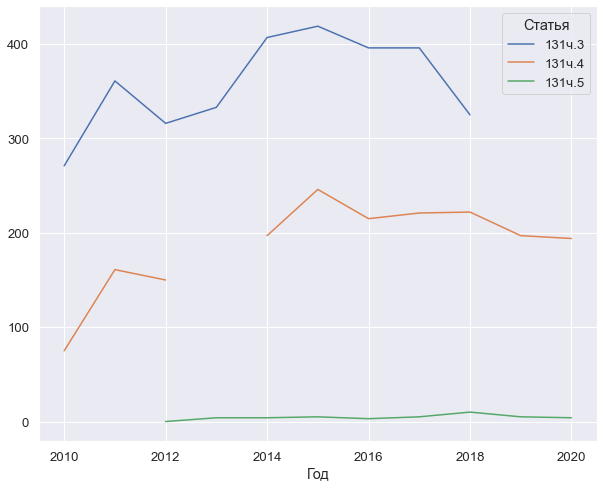

In [6]:
plot_article('131', kind='plot', total=True)

In [5]:
pd.pivot_table(
    data=dostoevsky_data[dostoevsky_data['Статья'].str.contains('131')], 
    index='Статья', 
    columns='Год', 
    values='Всего осуждено',
    aggfunc=np.sum,
#     margins=True
    )

Год,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Статья,,,,,,,,,,,
131ч.3,271.0,361.0,316.0,333.0,407.0,419.0,396.0,396.0,325.0,NaN,236.0
131ч.4,75.0,161.0,150.0,NaN,197.0,246.0,215.0,221.0,222.0,197.0,194.0
131ч.5,NaN,NaN,0.0,4.0,4.0,5.0,3.0,5.0,10.0,5.0,4.0


### 132 УК РФ. Насильственные действия сексуального характера

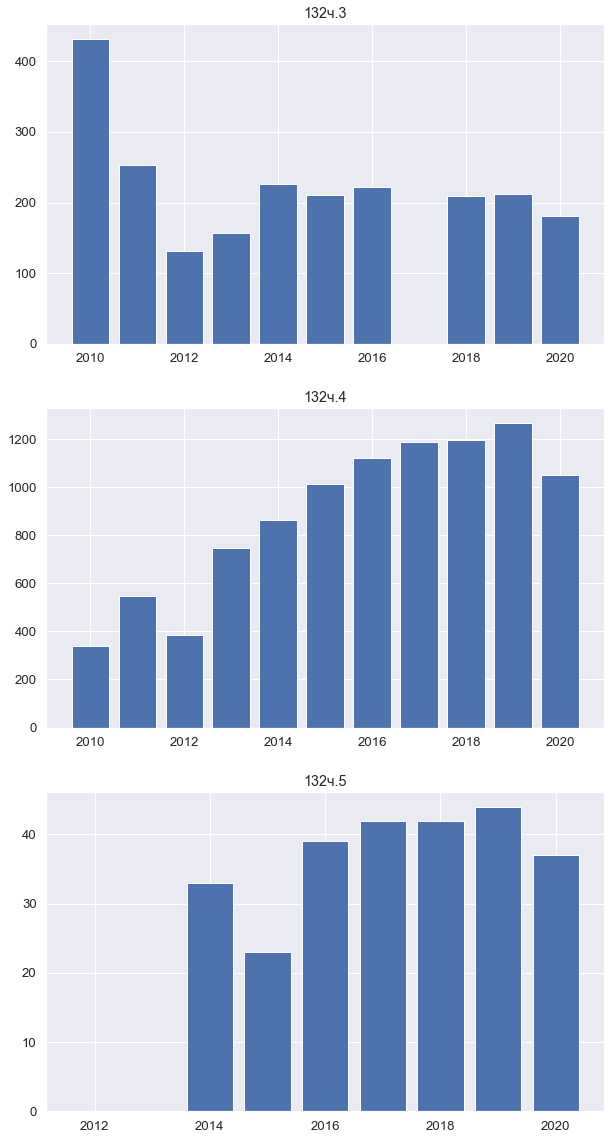

In [10]:
plot_article('132', kind='bar', figsize=(10,20))

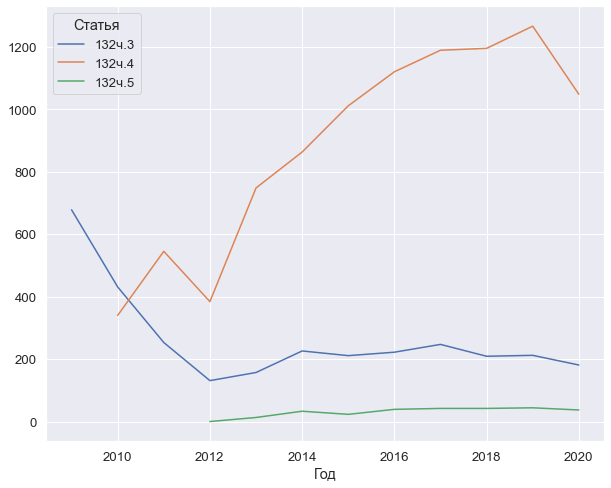

In [147]:
plot_article('132', kind='plot', total=True)

In [6]:
pd.pivot_table(
    data=dostoevsky_data[dostoevsky_data['Статья'].str.contains('132')], 
    index='Статья', 
    columns='Год', 
    values='Всего осуждено',
    aggfunc=np.sum,
#     margins=True
    )

Год,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Статья,,,,,,,,,,,
132ч.3,431.0,253.0,131.0,157.0,226.0,211.0,222.0,NaN,209.0,212.0,181.0
132ч.4,340.0,545.0,384.0,748.0,863.0,1011.0,1120.0,1189.0,1195.0,1266.0,1048.0
132ч.5,NaN,NaN,0.0,NaN,33.0,23.0,39.0,42.0,42.0,44.0,37.0


### 133 УК РФ. Понуждение к действиям сексуального характера

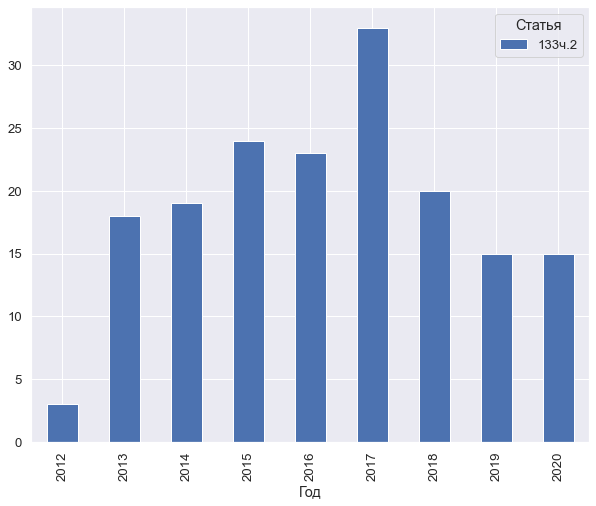

In [151]:
plot_article('133', kind='bar', total=True)

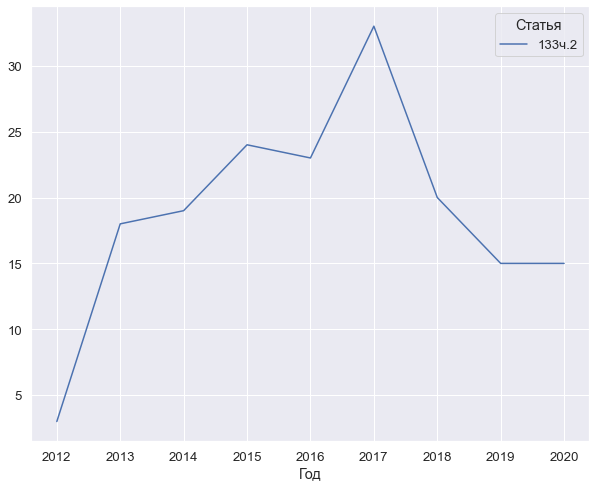

In [150]:
plot_article('133', kind='plot', total=True)

In [154]:
pd.pivot_table(
    data=dostoevsky_data[dostoevsky_data['Статья'].str.contains('133')], 
    index='Статья', 
    columns='Год', 
    values='Всего осуждено',
    aggfunc=np.sum,
#     margins=True
    )

Год,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
Статья,,,,,,,,,,
133ч.2,3,18,19,24,23,33,20,15,15,170
All,3,18,19,24,23,33,20,15,15,170


### 134 УК. Половое сношение и иные действия сексуального характера с лицом, не достигшим шестнадцатилетнего возраста

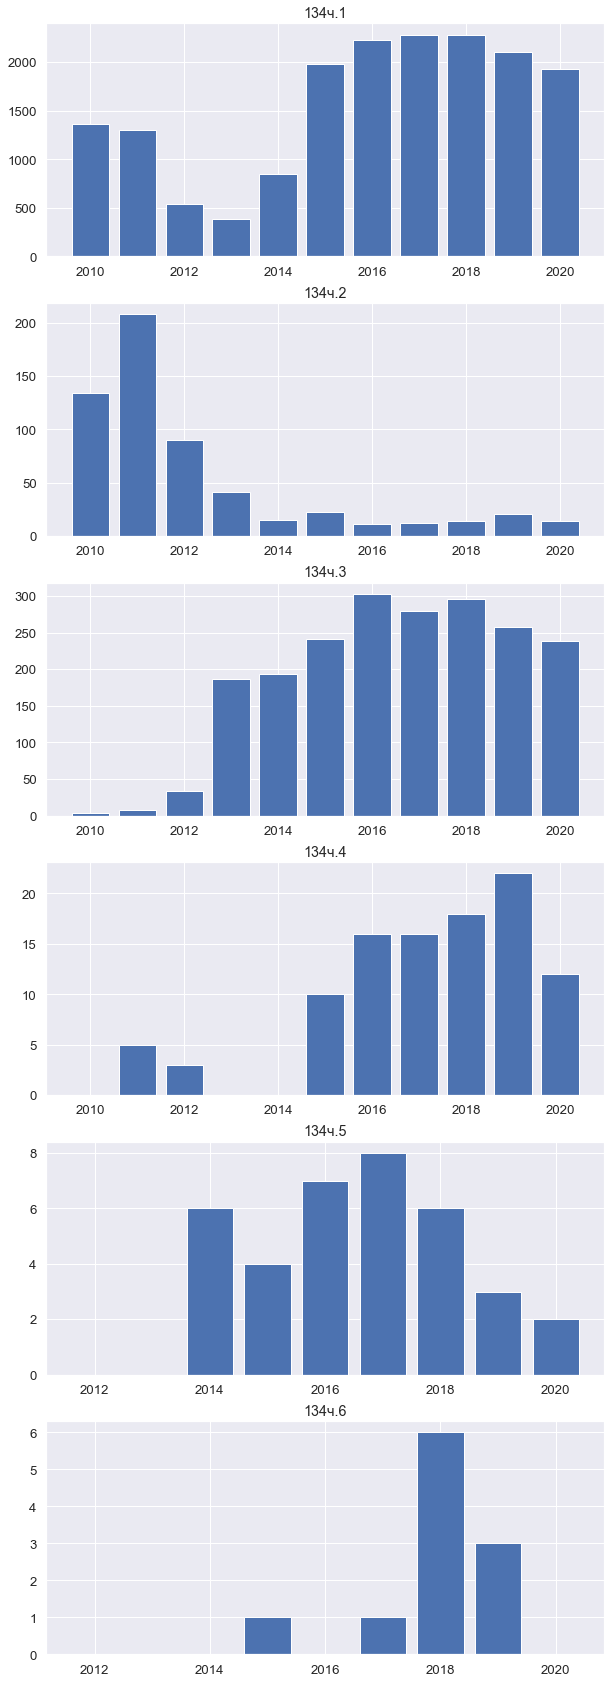

In [152]:
plot_article('134', kind='bar')

Рост количества дел есть по всем частям, кроме ч.2, где наоборот количество дел снизилось с нескольких сотен до нескольких дел в год.

По остальным частям кратный рост. Особенно он заметен по ч.1. В 2013 году по этой части было 382 приговора, а уже в 2015 - 1981 приговора, в 2016 - 2234 приговора.

*Но можно рассмотреть ещё вариант, что аномальный тут не рост с 2015 года, а наоборот снижение дел, которое было с 2012 по 2014 годы. Потому что в предшествующие годы 2010 и 2011 приговоров было больше 1300 в год, затем резко упало на несколко лет и снова начало расти, будто с компенсацией за "провальные" годы.*

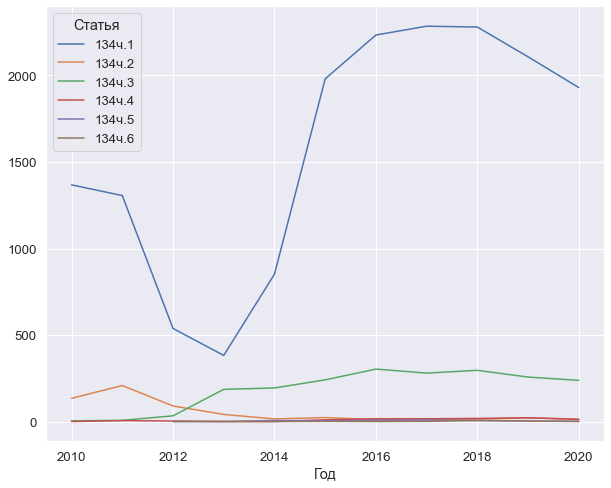

In [153]:
plot_article('134', kind='plot', total=True)

In [114]:
# сводная таблица по 134 статье
pd.pivot_table(
    data=dostoevsky_data[dostoevsky_data['Статья'].str.contains('134')], 
    index='Статья', 
    columns='Год', 
    values='Всего осуждено',
    aggfunc=np.sum,
    margins=True
    )

Год,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
Статья,,,,,,,,,,,,
134ч.1,1368.0,1306.0,538.0,382.0,852.0,1981.0,2234.0,2285.0,2280.0,2108.0,1930.0,17264
134ч.2,134.0,208.0,90.0,41.0,15.0,23.0,11.0,12.0,14.0,21.0,14.0,583
134ч.3,4.0,7.0,33.0,186.0,194.0,241.0,303.0,280.0,296.0,257.0,238.0,2039
134ч.4,0.0,5.0,3.0,0.0,0.0,10.0,16.0,16.0,18.0,22.0,12.0,102
134ч.5,NaN,NaN,0.0,0.0,6.0,4.0,7.0,8.0,6.0,3.0,2.0,36
134ч.6,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,6.0,3.0,0.0,11
All,1506.0,1526.0,664.0,609.0,1067.0,2260.0,2571.0,2602.0,2620.0,2414.0,2196.0,20035


### 135 УК. Развратные действия

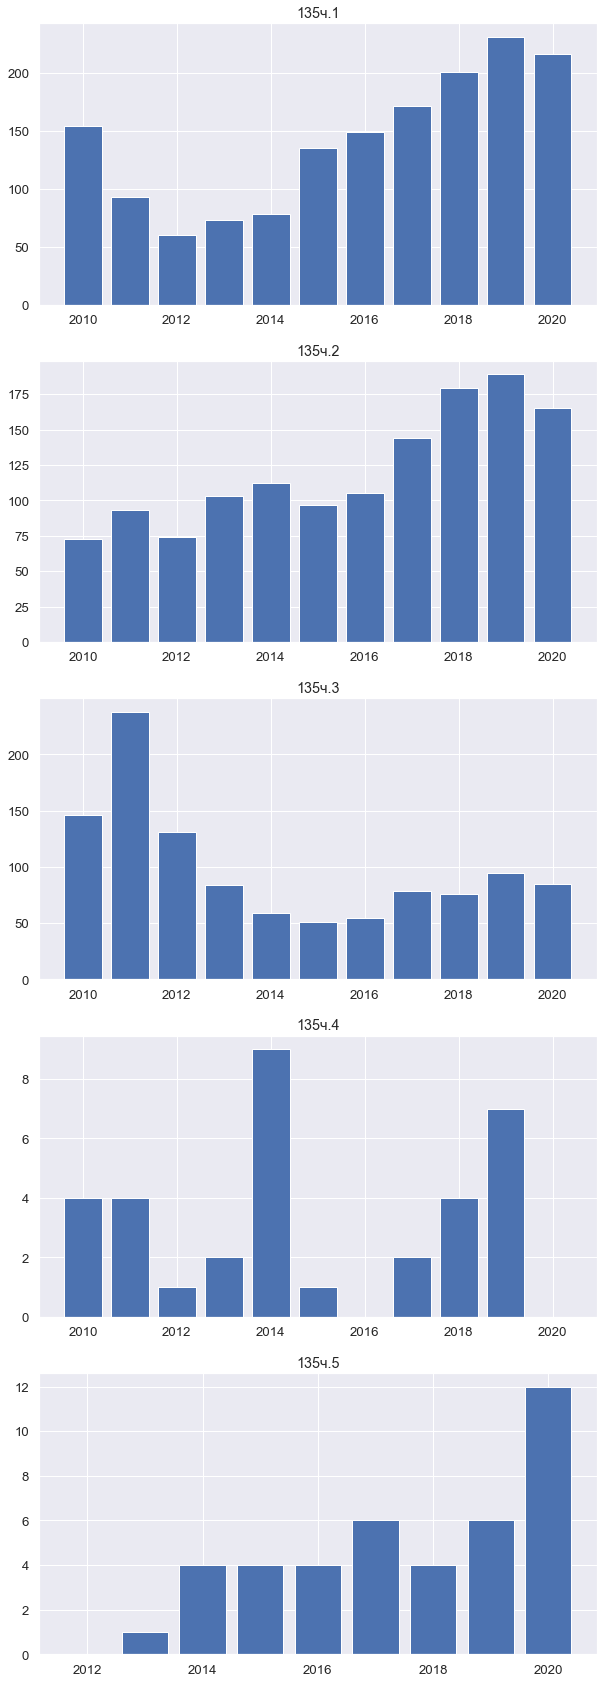

In [161]:
plot_article('135', kind='bar')

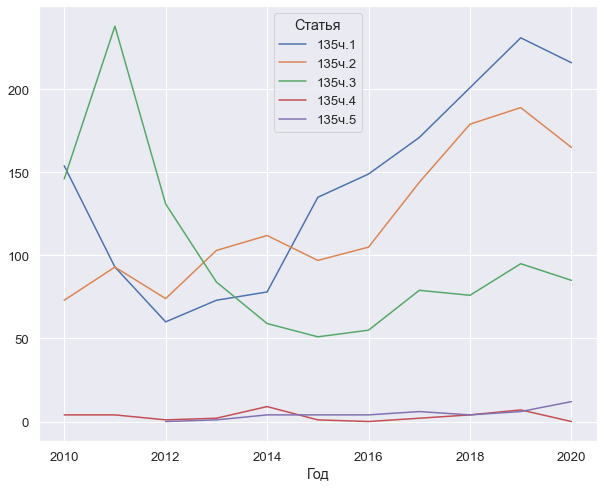

In [163]:
plot_article('135', kind='total', total=True)

По 135 статье в целом приговоров намного меньше, чем по 134 (4069 приговоров против 20035). Но и тут увеличение приговоров по всем частям кроме ч.5

In [8]:
# сводная таблица по 135 статье
pd.pivot_table(
    data=dostoevsky_data[dostoevsky_data['Статья'].str.contains('135')], 
    index='Статья', 
    columns='Год', 
    values='Всего осуждено',
    aggfunc=np.sum,
#     margins=True
    )

Год,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Статья,,,,,,,,,,,
135ч.1,154.0,93.0,60.0,73.0,78.0,135.0,149.0,171.0,201.0,231.0,216.0
135ч.2,73.0,93.0,74.0,103.0,112.0,97.0,105.0,144.0,179.0,189.0,165.0
135ч.3,146.0,238.0,131.0,84.0,59.0,51.0,55.0,79.0,76.0,95.0,85.0
135ч.4,4.0,4.0,1.0,2.0,9.0,1.0,0.0,2.0,4.0,7.0,0.0
135ч.5,NaN,NaN,0.0,1.0,4.0,4.0,4.0,6.0,4.0,6.0,12.0


### 242.1 УК. Незаконные изготовление и оборот порнографических материалов или предметов

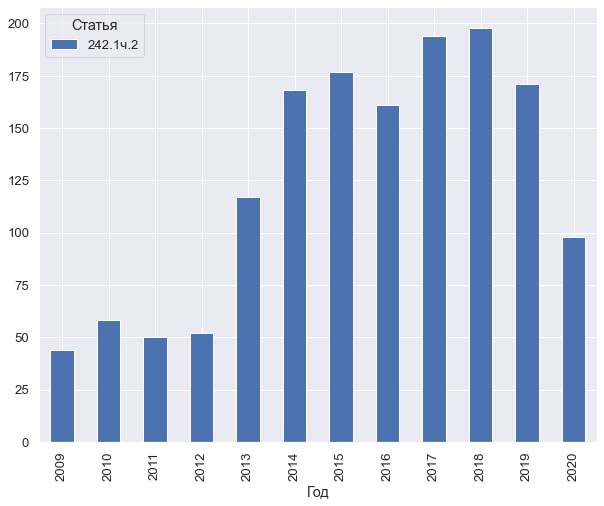

In [200]:
plot_article('242.1', kind='bar', total=True)

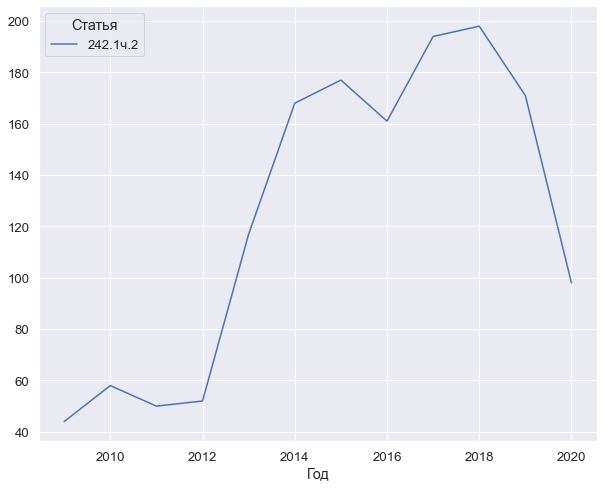

In [201]:
plot_article('242.1', kind='plot', total=True)

In [9]:
# сводная таблица по 242 статье
pd.pivot_table(
    data=dostoevsky_data[dostoevsky_data['Статья'].str.contains('242.1')], 
    index='Статья', 
    columns='Год', 
    values='Всего осуждено',
    aggfunc=np.sum,
#     margins=True
    )

Год,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Статья,,,,,,,,,,,,
242.1ч.2,44,58,50,52,117,168,177,161,194,198,171,98


### 242.2 УК. Изготовление и оборот материалов или предметов с порнографическими изображениями несовершеннолетних

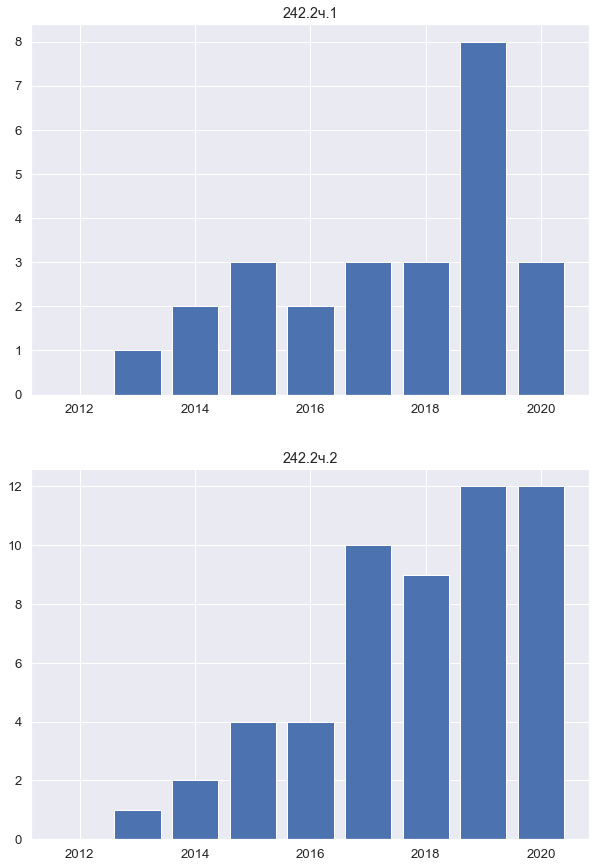

In [12]:
plot_article('242.2', kind='bar', figsize=(10,15))

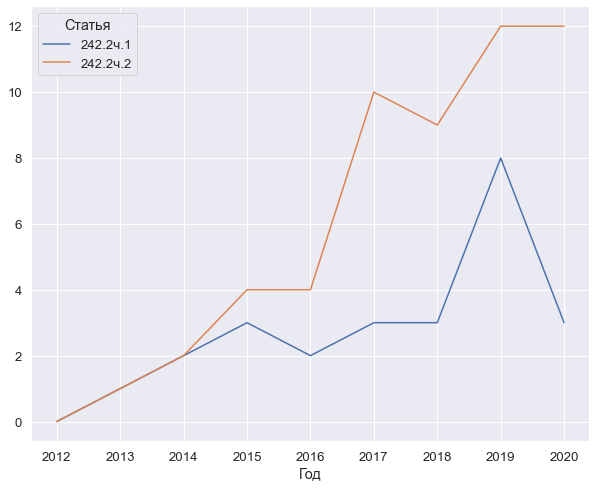

In [208]:
plot_article('242.2', kind='plot', total=True)

По 242.2 статьи УК приговоров ещё меньше. До 2017 года по ч.1 и ч.2 приговоров было меньше десяти в год, а по ч.3 с 2012 года не было ни одного приговора. Поэтому в абсолютных цифрах рост кол-ва дел не кажется существенным. 

### Сводные данные по всем статьям за все годы

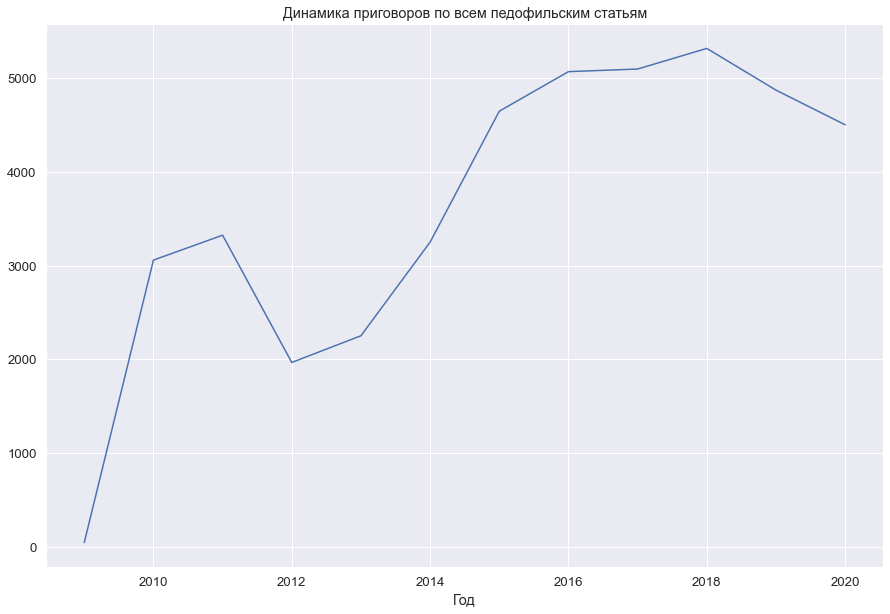

In [8]:
dostoevsky_data.groupby(['Год'])['Всего осуждено'].sum().plot(figsize=(15, 10))
plt.title('Динамика приговоров по всем педофильским статьям')
plt.show();

In [44]:
# общая сводная таблица по всем статьям
dostoyevsky_pivot = pd.pivot_table(
            data=dostoevsky_data, 
            index='Статья', 
            columns='Год', 
            values='Всего осуждено',
            aggfunc=np.sum,
#             margins=True
    )
dostoyevsky_pivot

Год,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Статья,,,,,,,,,,,,
131ч.3,NaN,271.0,361.0,316.0,333.0,407.0,419.0,396.0,396.0,325.0,NaN,236.0
131ч.4,NaN,75.0,161.0,150.0,NaN,197.0,246.0,215.0,221.0,222.0,197.0,194.0
131ч.5,NaN,NaN,NaN,0.0,4.0,4.0,5.0,3.0,5.0,10.0,5.0,4.0
132ч.3,NaN,431.0,253.0,131.0,157.0,226.0,211.0,222.0,NaN,209.0,212.0,181.0
132ч.4,NaN,340.0,545.0,384.0,748.0,863.0,1011.0,1120.0,1189.0,1195.0,1266.0,1048.0
132ч.5,NaN,NaN,NaN,0.0,NaN,33.0,23.0,39.0,42.0,42.0,44.0,37.0
133ч.2,NaN,NaN,NaN,3.0,18.0,19.0,NaN,23.0,33.0,20.0,15.0,15.0
134ч.1,NaN,1368.0,1306.0,538.0,382.0,852.0,1981.0,2234.0,2285.0,2280.0,2108.0,1930.0
134ч.2,NaN,134.0,208.0,90.0,41.0,15.0,23.0,11.0,12.0,14.0,21.0,14.0


In [41]:
dostoyevsky_pivot.sum(axis=1).sort_values(ascending=False)

Статья
134ч.1      17264.0
132ч.4       9709.0
131ч.3       3460.0
132ч.3       2233.0
134ч.3       2039.0
131ч.4       1878.0
135ч.1       1561.0
242.1ч.2     1488.0
135ч.2       1334.0
135ч.3       1099.0
134ч.2        583.0
132ч.5        260.0
133ч.2        146.0
134ч.4        102.0
242.2ч.2       54.0
135ч.5         41.0
131ч.5         40.0
134ч.5         36.0
135ч.4         34.0
242.2ч.1       25.0
134ч.6         11.0
dtype: float64

Видим, что количество приговоров по разным статьям распределены неравномерно. 62% всех приговоров приходится всего на две статьи: 134ч.1 (Половое сношение и иные действия сексуального характера с лицом, не достигшим шестнадцатилетнего возраста) и 132ч.4 (Насильственные действия сексуального характера) - это 26 973 приговоров с 2010 по 2020 годы.

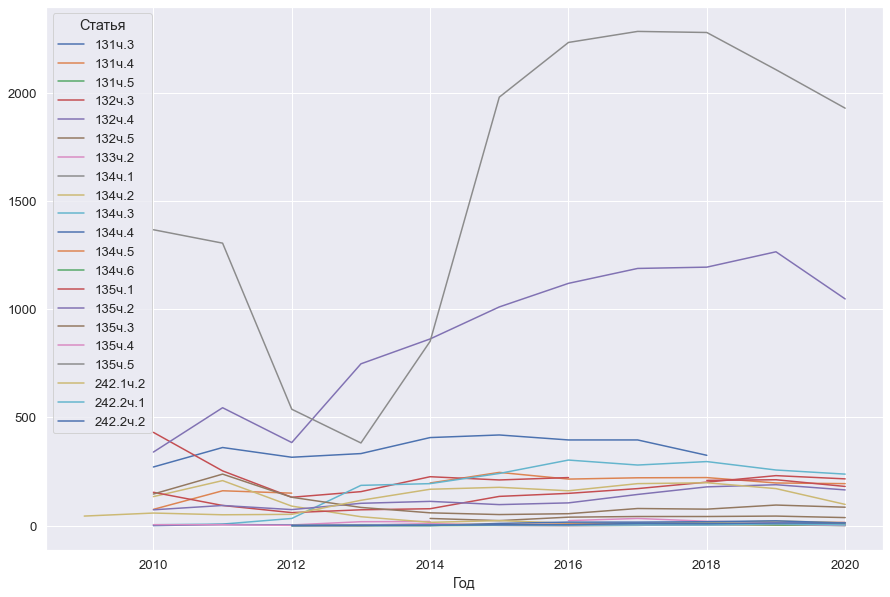

In [16]:
dostoyevsky_pivot.T.plot(figsize=(15, 10));

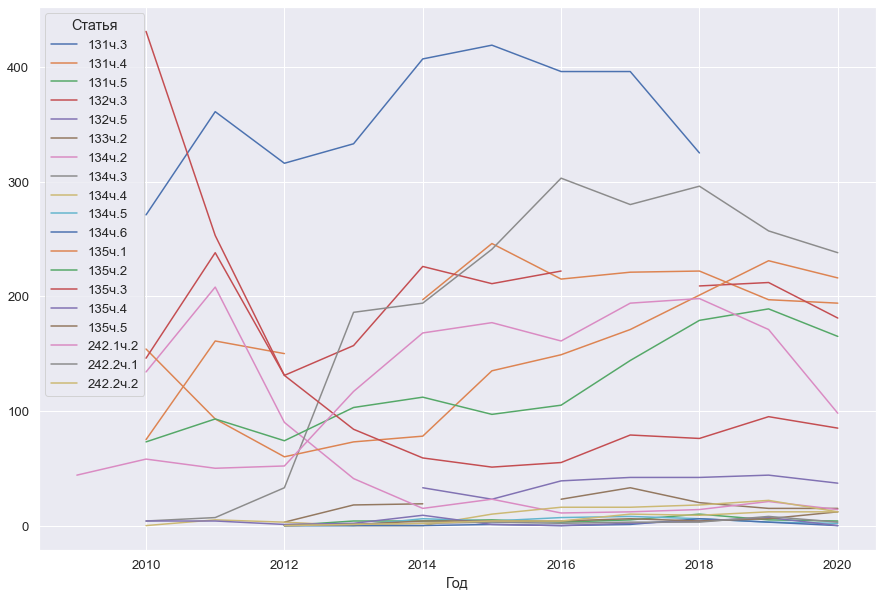

In [22]:
# Рост количества дел без двух самых массовых статей
dostoyevsky_pivot.T.drop(['132ч.4', '134ч.1'], axis=1).plot(figsize=(15, 10));

## Как наказывают за педофилию

In [23]:
dostoevsky_data.groupby('Год')['Лишение свободы'].sum()

Год
2009      17
2010    1728
2011    1971
2012    1296
2013    1717
2014    2240
2015    2557
2016    2742
2017    2709
2018    2867
2019    2564
2020    2400
Name: Лишение свободы, dtype: int64

In [25]:
punishments = dostoevsky_data.drop(columns=['Статья', 'Название', 'Судебный штраф: общая сумма'])
punishments = punishments.loc[:, (punishments.sum() > 0)]
punishments['Статья'] = dostoevsky_data['Статья']
punishments['Название'] = dostoevsky_data['Название']

Колонок очень много. Нужно подумать как организовать информацию о наказаниях, но при этом не потерять важную информацию.

* сделаем очевидную разбивку: сколько наказали, а сколько оправдали
* сделаем вторую очевидную разбивку из наказаний: какое наказание вынес суд
* подробнее о признаках в датасете: https://beta.dostoevsky.io/ru/faq/#glossary-fine

In [6]:
# функция для извлечения данных для одной статьи и всех её частей
def get_article_punishments(article, threshhold=False):
    data = punishments[punishments['Статья'].str.contains(article)].groupby(['Год'])[punishments.columns[1:]].sum()
#     data = data.loc[:, (data.sum() > 0)] # drop empty columns
    if threshhold:
        data = data.loc[:, (data.sum() >= threshhold)]
    return data

Создаём маски для извлечения нужных признаков

In [30]:
# оправдано
acquittal = [
    'Оправдано',
]

# осуждено
convicted = [
    'Пожизненное лишение свободы', 
    'Лишение свободы',
    'Условное осуждение к лишению свободы', 
    'Ограничение свободы',
    'Исправительные работы', 
    'Обязательные работы', 
    'Принудительные работы',
    'Штраф',
    'Лишение права занимать определенные должности или заниматься определенной деятельностью',
    'Условное осуждение к иным мерам',
    'Содержание в дисциплинарной воинской части',
    'Наказание назначено ниже низшего предела: лишение свободы',
]

# Освобождение от наказания
exemption = [
    'Освобождено от наказания Освобождено от наказания: по амнистии',
    'Освобождено от наказания Освобождено от наказания: по другим основаниям: от лишения свободы',
    'Освобождено от наказания Освобождено от наказания: по другим основаниям: от иных мер или наказание не назначалось',
    'Освобождено от наказания по другим основаниям/от лишения свободы',
    'Освобождено от наказания по другим основаниям/от иных мер',
    'Освобождено от наказания в связи с зачетом срока содержания под стражей, домашнего ареста/от лишения свободы',
    'Освобождено от наказания в связи с зачетом срока содержания под стражей, домашнего ареста/от иных мер',
]

# принудительные меры
coercive_measures = [
    'Принудительные меры к невменяемым', 
    'Принудительные меры медицинского характера в отношении невменяемого дополнительная квалификация по судебным постановлениям по количеству составов преступлений',
] 

# судебное производство было прекращено
dismissal = [
    'Прекращено за отсутствием события, состава, непричастностью к преступлению',
    'Прекращено по амнистии', 
    'Прекращено за примирением с потерпевшим',
    'Прекращено в связи с деятельным раскаянием',
    'Прекращено судебный штраф', 
    'Прекращено по другим основаниям',
    'Прекращено по другим основаниям: на основании примечаний к статьям УК РФ (в связи с деятельным раскаянием ч. 2 ст. 28 УПК РФ)',
] 

In [8]:
def sum_of_punishment(data, axis=1):
    """
    функция для извлечения типа наказания
    в неё передаётся датафрейм из get_article_punishments
    или любой датафрейм с группировкой по статье и году
    """
    conv = data[convicted].sum(axis=axis)
    acq = data[acquittal].sum(axis=axis)
    exemp = data[exemption].sum(axis=axis)
    coe_meas = data[coercive_measures].sum(axis=axis)
    dis = data[dismissal].sum(axis=axis)

    return pd.DataFrame({
        'Всего осуждено (для проверки)': data['Всего осуждено'],
        'осуждено': conv,
        'оправдано': acq,
        'освобождено от наказания': exemp,
        'принудительные меры': coe_meas,
        'судебное производство прекращено': dis
    })

In [9]:
# виды наказаний
imprisonment = [
    'Пожизненное лишение свободы', 
    'Лишение свободы',
    'Наказание назначено ниже низшего предела: лишение свободы',
    'Содержание в дисциплинарной воинской части',
]

suspended = [
    'Условное осуждение к лишению свободы', 
    'Условное осуждение к иным мерам']

labour = [
    'Исправительные работы', 
    'Обязательные работы', 
    'Принудительные работы',
]

def type_of_convicted(data):
    """
    функция для извлечения типа наказания
    в неё передаётся датафрейм из get_article_punishments
    или любой датафрейм с группировкой по статье и году
    """
    fines = data['Штраф']
    imprisonments = data[imprisonment].sum(axis=1)
    suspendeds = data[suspended].sum(axis=1)
    labours = data[labour].sum(axis=1)
    restrains = data['Ограничение свободы']
    disqualifications = data['Лишение права занимать определенные должности или заниматься определенной деятельностью']
    return pd.DataFrame({
        'штраф': fines,
        'Наказание назначено ниже низшего предела: лишение свободы': data['Наказание назначено ниже низшего предела: лишение свободы'],
        'лишение свободы': imprisonments,
        'условное наказание': suspendeds,
        'работы': labours,
        'ограничение свободы': restrains,
        'лишение права занимать определенные должности или заниматься определенной деятельностью': disqualifications
    }) 

### Динамика наказаний по всем "педофильским" статьям

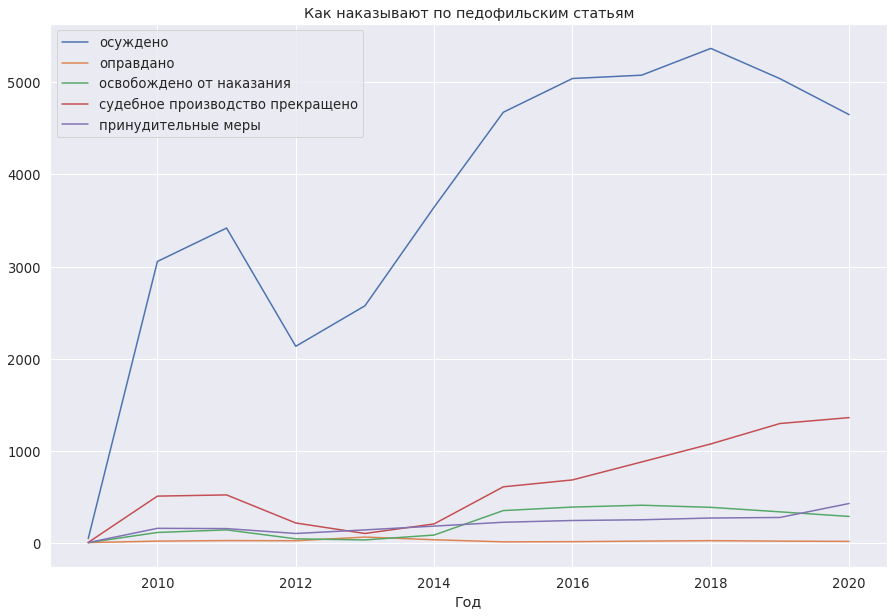

In [46]:
_  = pd.concat([
    dostoevsky_data.groupby('Год')[convicted].sum().sum(1), # осуждено
    dostoevsky_data.groupby('Год')[acquittal].sum().sum(1), # оправдано
    dostoevsky_data.groupby('Год')[exemption].sum().sum(1), # освобождено от наказания
    dostoevsky_data.groupby('Год')[dismissal].sum().sum(1), # судебное производство было прекращено
    dostoevsky_data.groupby('Год')[coercive_measures].sum().sum(1), # принудительные меры
], axis=1)

_.columns = ['осуждено', 'оправдано', 'освобождено от наказания', 'судебное производство прекращено', 'принудительные меры']

_.plot(figsize=(15, 10))
plt.title('Как наказывают по педофильским статьям');

In [14]:
convicted_main = [
    'Лишение свободы',
    'Условное осуждение к лишению свободы', 
    'Ограничение свободы',
    'Исправительные работы', 
    'Обязательные работы', 
    'Штраф',
    'Наказание назначено ниже низшего предела: лишение свободы',
]

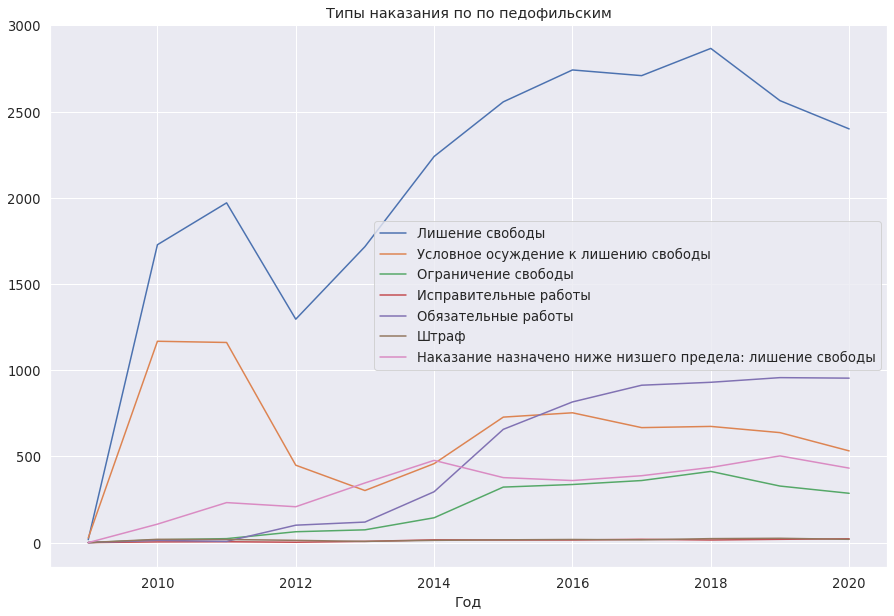

In [48]:
dostoevsky_data.groupby('Год')[convicted_main].sum().plot(figsize=(15, 10))
plt.title('Типы наказания по по педофильским')
plt.show()

Видим резкий рост дел, производство по которым было прекращено. Эксперты считают, что 90-95 процентов таких дел были псевдопедофильскими, когда в следствии нет вообще ничего, чтобы вынести обвинительный приговор.

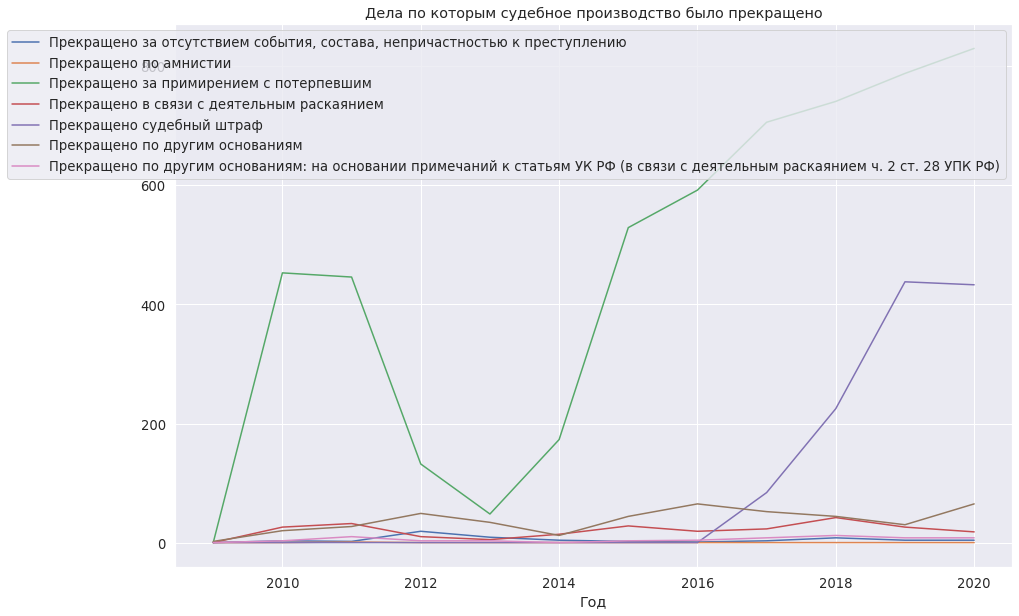

In [49]:
dostoevsky_data.groupby('Год')[dismissal].sum().plot(figsize=(15, 10))
plt.title('Дела по которым судебное производство было прекращено')
plt.show()

При этом оправдательных приговоров за все годы чуть больше двухсот приговоров

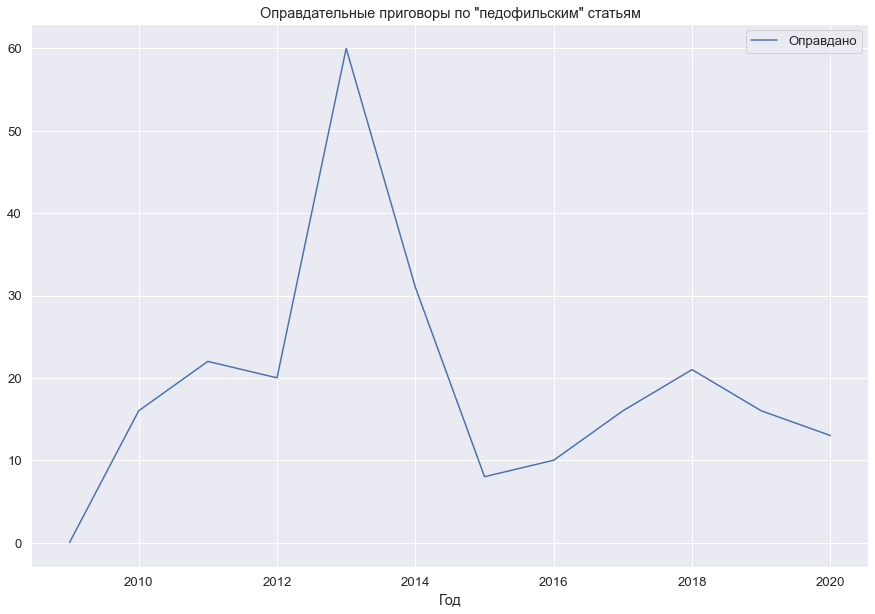

In [67]:
dostoevsky_data.groupby('Год')[acquittal].sum().plot(figsize=(15, 10))
plt.title('Оправдательные приговоры по "педофильским" статьям')
plt.show()

### 134 УК. Половое сношение и иные действия сексуального характера с лицом, не достигшим шестнадцатилетнего возраста

In [35]:
punishments_134 = get_article_punishments('134')
outcome_134 = sum_of_punishment(punishments_134)
outcome_134

,Всего осуждено (для проверки),осуждено,оправдано,освобождено от наказания,принудительные меры,судебное производство прекращено
Год,,,,,,
2010,1506,1399.0,1,109.0,14.0,487.0
2011,1526,1400.0,2,135.0,16.0,502.0
2012,664,637.0,0,39.0,6.0,187.0
2013,609,604.0,0,24.0,7.0,65.0
2014,1067,1016.0,2,76.0,13.0,181.0
2015,2260,1949.0,1,343.0,18.0,560.0
2016,2571,2243.0,1,377.0,19.0,617.0
2017,2602,2254.0,0,396.0,18.0,807.0
2018,2620,2304.0,3,362.0,23.0,983.0


Не сходится значения `Всего осуждено (для проверки)` из данных Верховного суда и `осуждено`, которая является суммой других наказаний. Возможно я не учитываю какой-то признак. Но в целом теряется не так много приговоров.

Оправдательных приговоров суд почти не выносит. По 134 статье за 10 лет было всего 14 оправдательных приговора. Также с годами растёт количество дел, по которым судебное производство прекращено.

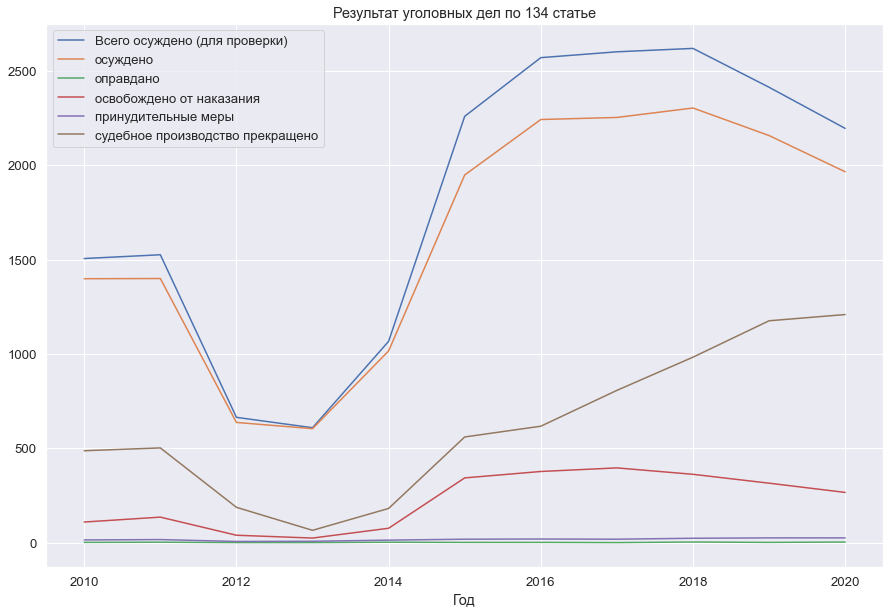

In [36]:
outcome_134.plot(figsize=(15, 10)); #.iloc[:, 1:]
plt.title('Результат уголовных дел по 134 статье')
plt.show();

Что есть интересного в распределении наказаний по 134 статье:
* вместе с ростом кол-ва дел сильнее всего выросло кол-ва приговоров с наказанием в виде обязательных работ, что скорее всего объясняется ростом дел по ч.1 134 статьи, наказание в котором предусматривается обязательными работами.
* наказания с лишением свободы выросло не так сильно по сравнению с началом 10-х годов, значительная часть приговоров ушли в более лёгкие наказания. 
* по значительной части дел производство было прекращено

In [48]:
pd.DataFrame(outcome_134.sum())

,0
Всего осуждено (для проверки),20035.0
осуждено,17930.0
оправдано,14.0
освобождено от наказания,2442.0
принудительные меры,184.0
судебное производство прекращено,6774.0


Производство по большинству дел было прекращено либо за примирением с потерпевшим, либо по судебному штрафу.

In [47]:
pd.DataFrame(punishments_134[dismissal].sum())

,0
"Прекращено за отсутствием события, состава, непричастностью к преступлению",31.0
Прекращено по амнистии,1.0
Прекращено за примирением с потерпевшим,5243.0
Прекращено в связи с деятельным раскаянием,233.0
Прекращено судебный штраф,1075.0
Прекращено по другим основаниям,129.0
Прекращено по другим основаниям: на основании примечаний к статьям УК РФ (в связи с деятельным раскаянием ч. 2 ст. 28 УПК РФ),62.0


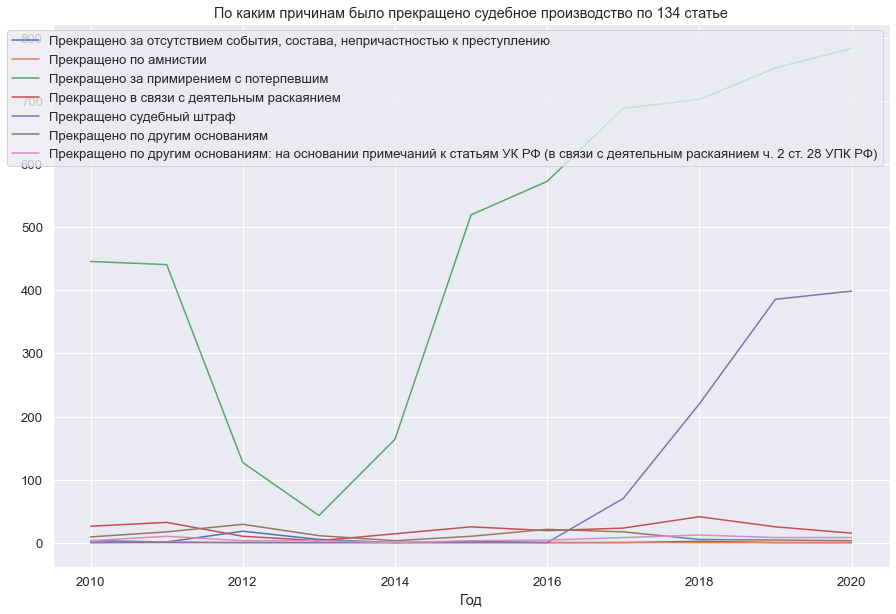

In [45]:
punishments_134[dismissal].plot(figsize=(15, 10))
plt.title('По каким причинам было прекращено судебное производство по 134 статье')
plt.show();

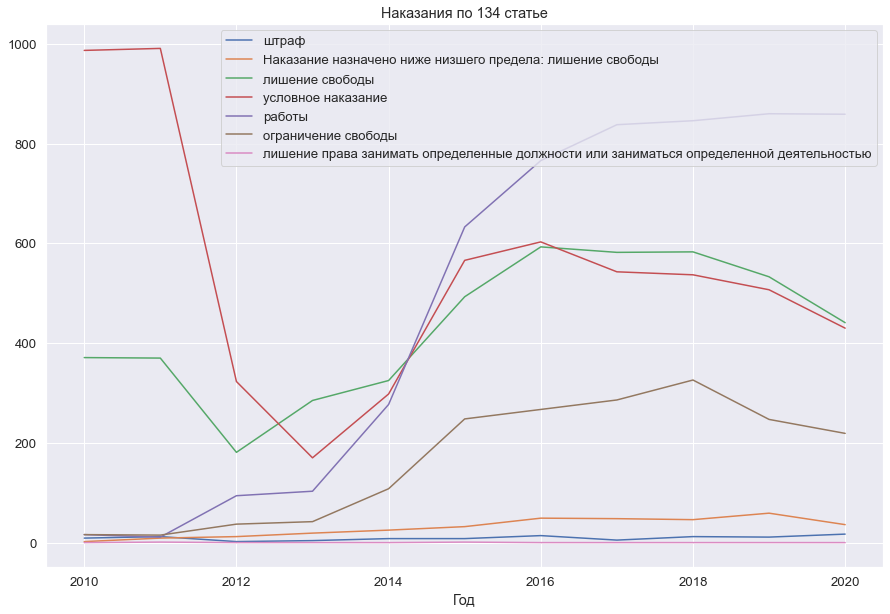

In [116]:
type_of_convicted(punishments_134).plot(figsize=(15, 10))
plt.title('Наказания по 134 статье')
plt.show();

### 131 УК РФ. Изнасилование

In [63]:
punishments_131 = get_article_punishments('131')
outcome_131 = sum_of_punishment(punishments_131)
outcome_131

,Всего осуждено (для проверки),осуждено,оправдано,освобождено от наказания,принудительные меры,судебное производство прекращено
Год,,,,,,
2010,346,370.0,10,0.0,10.0,2.0
2011,522,598.0,19,0.0,19.0,3.0
2012,466,535.0,11,1.0,11.0,3.0
2013,337,389.0,17,0.0,9.0,3.0
2014,608,698.0,8,1.0,25.0,4.0
2015,670,727.0,1,0.0,26.0,3.0
2016,614,664.0,2,1.0,19.0,9.0
2017,622,666.0,4,0.0,23.0,7.0
2018,557,613.0,2,2.0,18.0,12.0


По 131 статье сплошь обвинительные приговоры. 

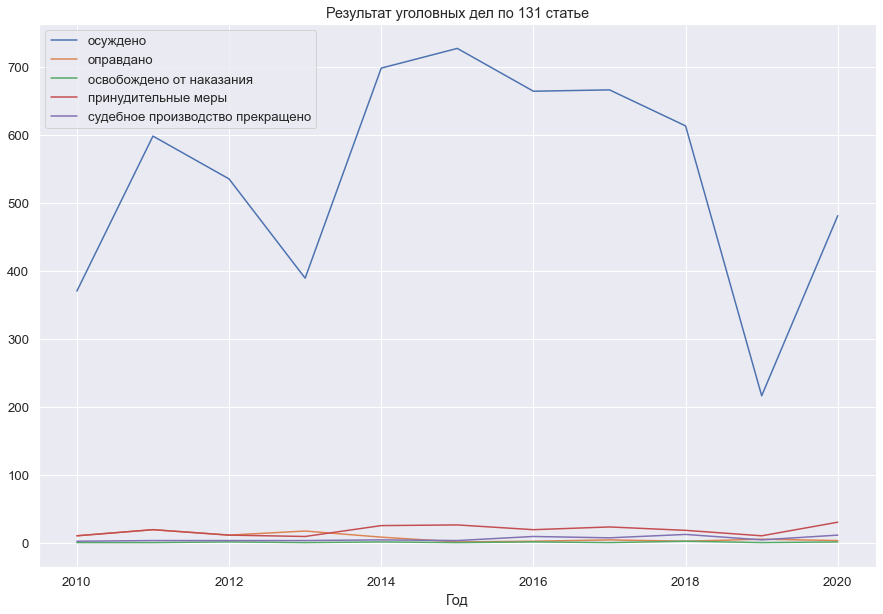

In [99]:
outcome_131.iloc[:, 1:].plot(figsize=(15, 10)); #.iloc[:, 1:]
plt.title('Результат уголовных дел по 131 статье')
plt.show();

И наказания в основном с лишением свободы

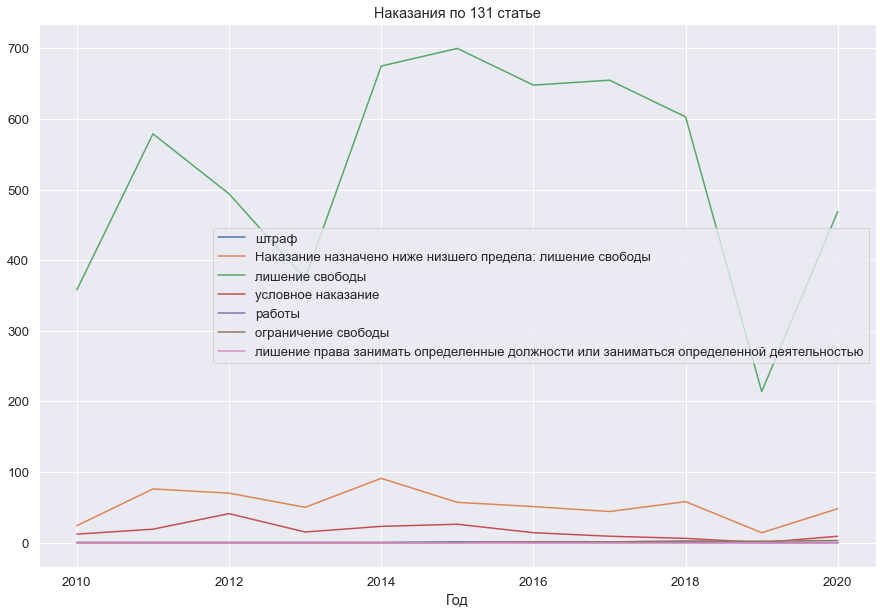

In [119]:
type_of_convicted(punishments_131).plot(figsize=(15, 10))
plt.title('Наказания по 131 статье')
plt.show();

### 132 УК РФ. Насильственные действия сексуального характера

In [17]:
punishments_132 = get_article_punishments('132')
outcome_132 = sum_of_punishment(punishments_132)
outcome_132

,Всего осуждено (для проверки),осуждено,оправдано,освобождено от наказания,принудительные меры,судебное производство прекращено
Год,,,,,,
2010,771,845.0,4,0.0,83.0,4.0
2011,798,923.0,1,1.0,61.0,5.0
2012,515,617.0,8,0.0,51.0,4.0
2013,905,1152.0,41,2.0,102.0,8.0
2014,1122,1441.0,19,1.0,115.0,7.0
2015,1245,1503.0,5,1.0,152.0,25.0
2016,1381,1610.0,3,1.0,163.0,25.0
2017,1231,1467.0,10,2.0,174.0,26.0
2018,1446,1715.0,12,4.0,193.0,21.0


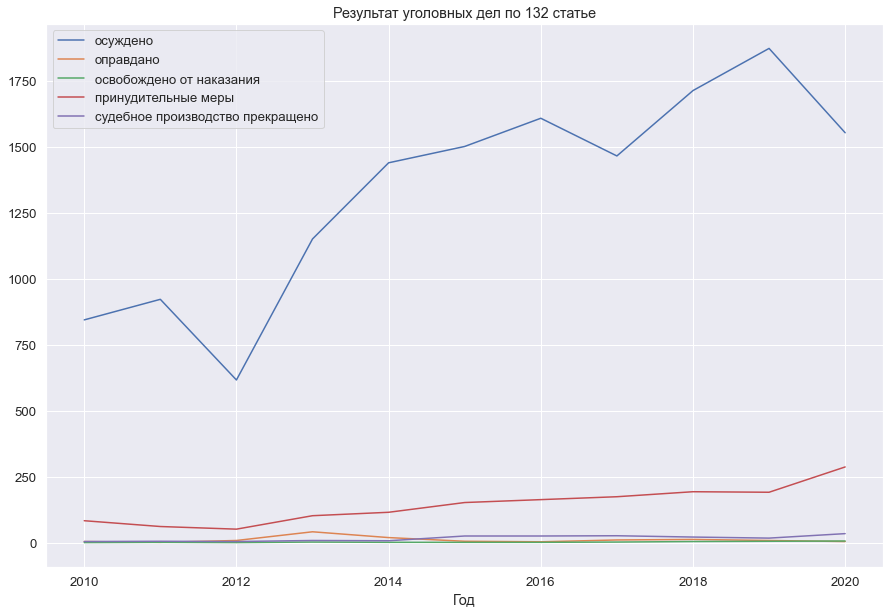

In [18]:
outcome_132.iloc[:, 1:].plot(figsize=(15, 10)); #.iloc[:, 1:]
plt.title('Результат уголовных дел по 132 статье')
plt.show();

Тут интересно, что вместе с наказанием в виде лишения свободы увеличились число наказаний ниже низжего предела. Эйсман в одном интервью говорила, что такое происходит, когда система не может сдать назад, но и наказать по всей строгости совести не хватает.

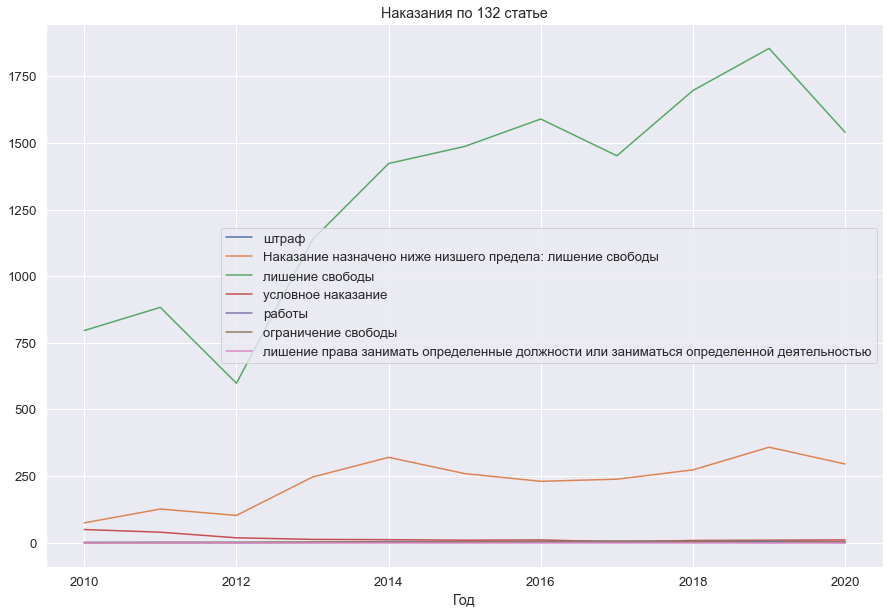

In [114]:
type_of_convicted(punishments_132).plot(figsize=(15, 10))
plt.title('Наказания по 132 статье')
plt.show();

Примерно 18% всех приговоров к лишению свободы по 132 статье УК были ниже низшего предела. 

In [20]:
type_of_convicted(punishments_132).sum()

штраф                                                                                         13.0
Наказание назначено ниже низшего предела: лишение свободы                                   2521.0
лишение свободы                                                                            14458.0
условное наказание                                                                           178.0
работы                                                                                        21.0
ограничение свободы                                                                           33.0
лишение права занимать определенные должности или заниматься определенной деятельностью        0.0
dtype: float64

### 133 УК РФ. Понуждение к действиям сексуального характера

In [26]:
punishments_133 = get_article_punishments('133')
outcome_133 = sum_of_punishment(punishments_133)
outcome_133

,Всего осуждено (для проверки),осуждено,оправдано,освобождено от наказания,принудительные меры,судебное производство прекращено
Год,,,,,,
2012,3,3.0,0,0.0,0.0,0.0
2013,18,18.0,0,0.0,0.0,3.0
2014,19,19.0,0,0.0,0.0,1.0
2016,23,23.0,0,0.0,0.0,2.0
2017,33,33.0,0,0.0,0.0,7.0
2018,20,19.0,0,1.0,0.0,4.0
2019,15,15.0,0,0.0,0.0,17.0
2020,15,14.0,0,1.0,1.0,15.0


Здесь, как и в 134 статье, рост дел, по которым судебное производство было прекращено. Но в целом приговоров по этой статье очень мало

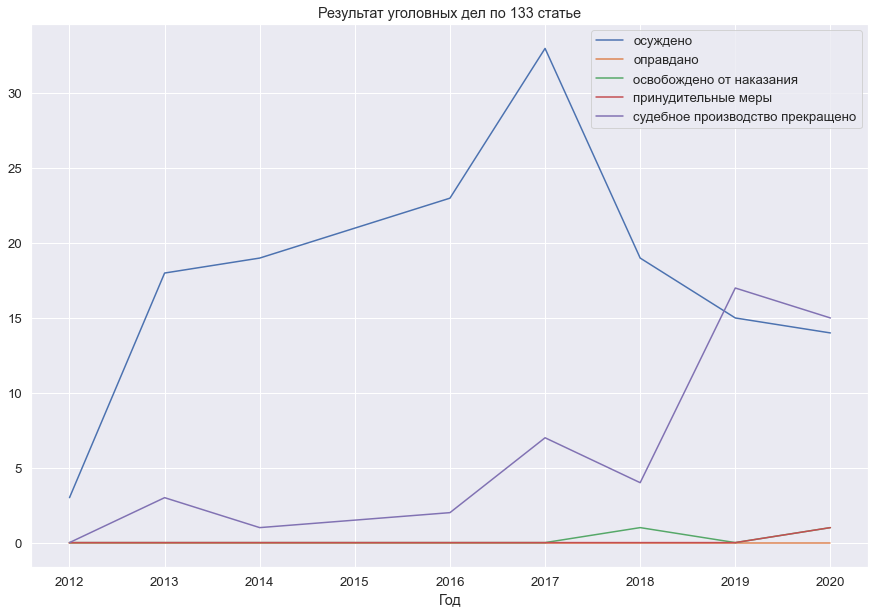

In [103]:
outcome_133.iloc[:, 1:].plot(figsize=(15, 10)); #.iloc[:, 1:]
plt.title('Результат уголовных дел по 133 статье')
plt.show();

Хоть статья и не массовая, но тем не менее, производство по трети всех дел было прекращено. 

In [31]:
outcome_133.iloc[:, 1:].sum()

осуждено                            144.0
оправдано                             0.0
освобождено от наказания              2.0
принудительные меры                   1.0
судебное производство прекращено     49.0
dtype: float64

К концу 10-х приговоров с лишением свободы и условным сроком сравнялись.

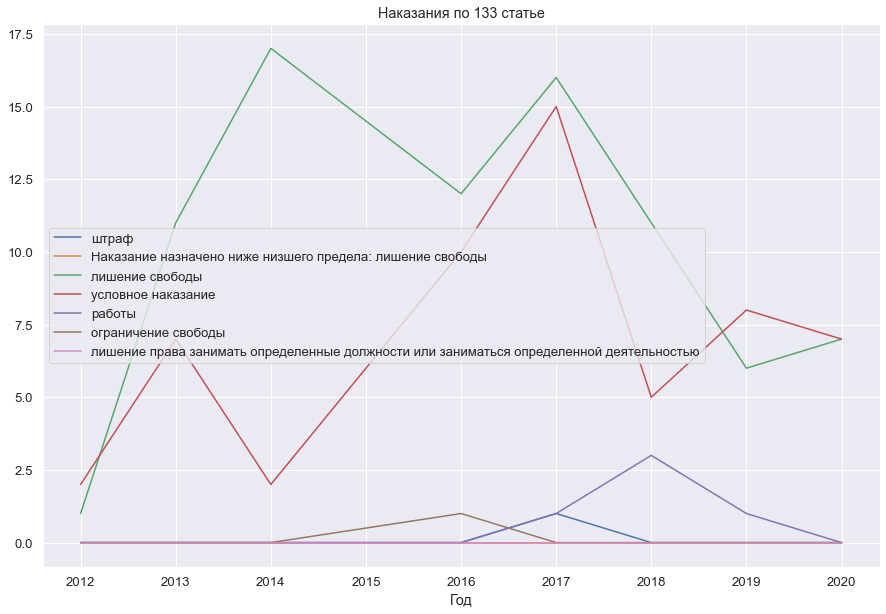

In [113]:
type_of_convicted(punishments_133).plot(figsize=(15, 10))
plt.title('Наказания по 133 статье')
plt.show();

### 135 УК. Развратные действия

In [49]:
punishments_135 = get_article_punishments('135')
outcome_135 = sum_of_punishment(punishments_135)
outcome_135

,Всего осуждено (для проверки),осуждено,оправдано,освобождено от наказания,принудительные меры,судебное производство прекращено
Год,,,,,,
2010,377,383.0,1,1.0,48.0,11.0
2011,428,445.0,0,2.0,56.0,8.0
2012,266,288.0,1,1.0,29.0,19.0
2013,263,283.0,2,3.0,16.0,19.0
2014,262,287.0,2,3.0,25.0,10.0
2015,288,301.0,1,4.0,21.0,17.0
2016,313,325.0,3,6.0,33.0,27.0
2017,402,419.0,1,7.0,22.0,28.0
2018,464,489.0,0,13.0,26.0,51.0


In [51]:
pd.DataFrame(outcome_135.iloc[:, 1:].sum())

,0
осуждено,4300.0
оправдано,11.0
освобождено от наказания,62.0
принудительные меры,381.0
судебное производство прекращено,350.0


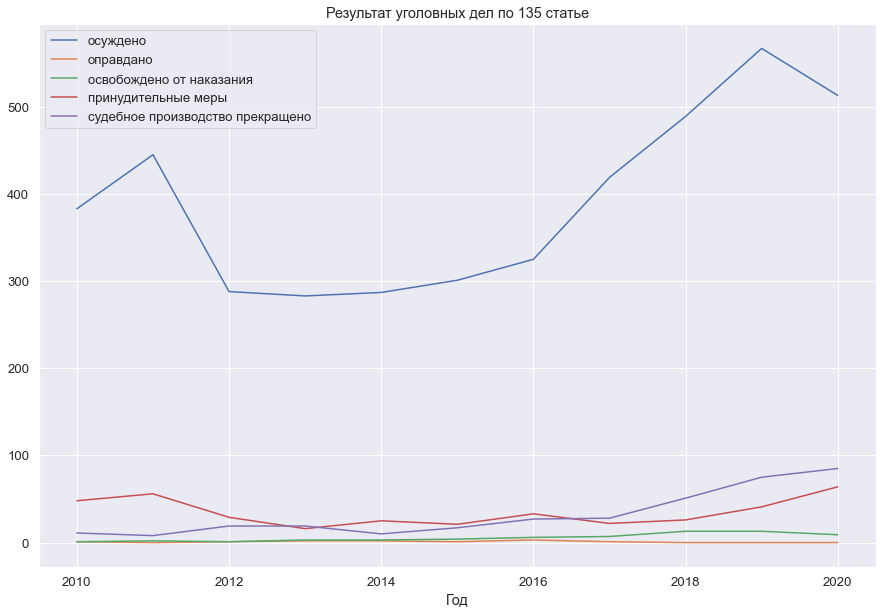

In [118]:
outcome_135.iloc[:, 1:].plot(figsize=(15, 10)); #.iloc[:, 1:]
plt.title('Результат уголовных дел по 135 статье')
plt.show();

* рост лишений свободы
* и одновременный рост "принудительных мер" и "судебное производство прекращено"

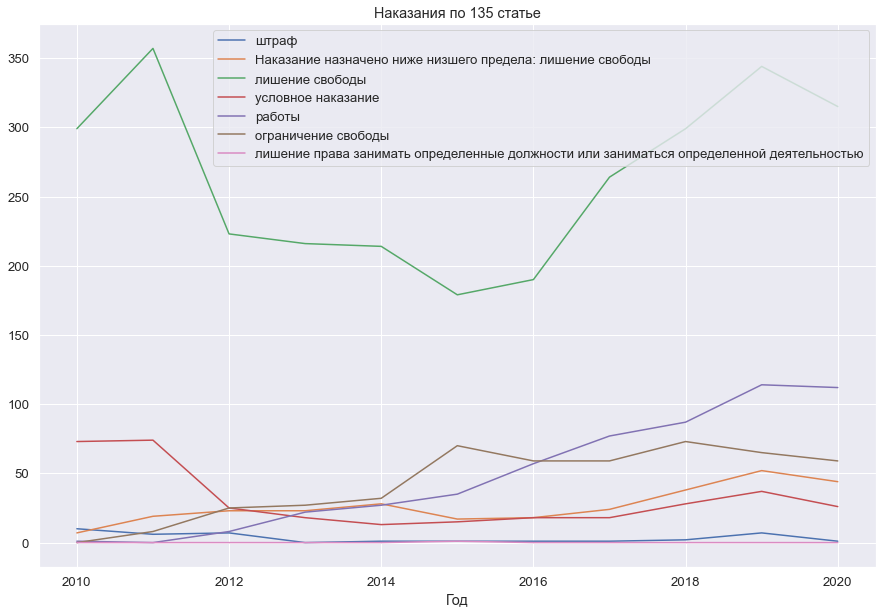

In [117]:
type_of_convicted(punishments_135).plot(figsize=(15, 10))
plt.title('Наказания по 135 статье')
plt.show();

### 242.1 УК. Незаконные изготовление и оборот порнографических материалов или предметов

In [90]:
punishments_242_1 = get_article_punishments('242.1')
outcome_242_1 = sum_of_punishment(punishments_242_1)
outcome_242_1

,Всего осуждено (для проверки),осуждено,оправдано,освобождено от наказания,принудительные меры,судебное производство прекращено
Год,,,,,,
2009,44,44.0,0,0.0,0.0,2.0
2010,58,58.0,0,0.0,0.0,1.0
2011,50,52.0,0,0.0,0.0,0.0
2012,52,53.0,0,0.0,2.0,0.0
2013,117,124.0,0,0.0,4.0,1.0
2014,168,180.0,0,1.0,1.0,0.0
2015,177,189.0,0,0.0,4.0,1.0
2016,161,172.0,1,1.0,6.0,1.0
2017,194,224.0,1,1.0,11.0,1.0


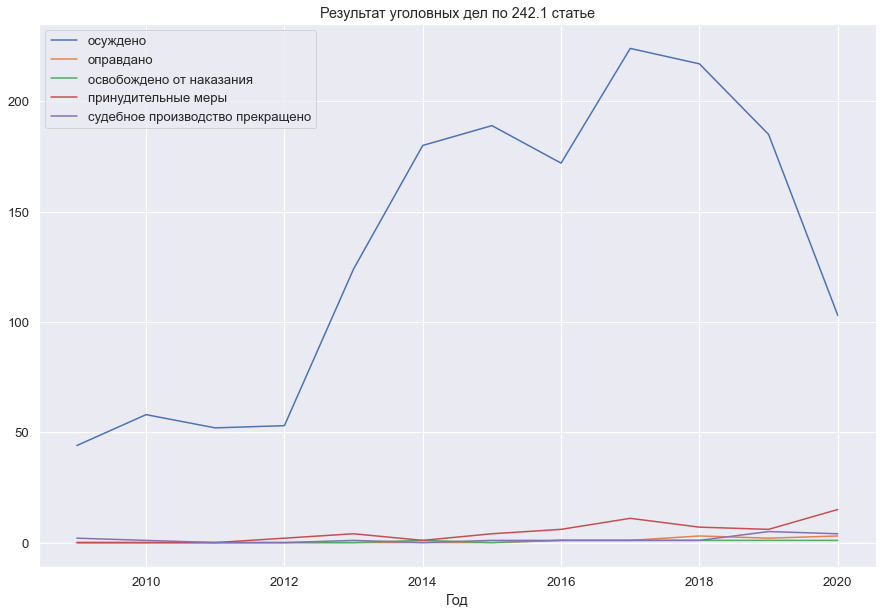

In [111]:
outcome_242_1.iloc[:, 1:].plot(figsize=(15, 10)); #.iloc[:, 1:]
plt.title('Результат уголовных дел по 242.1 статье')
plt.show();

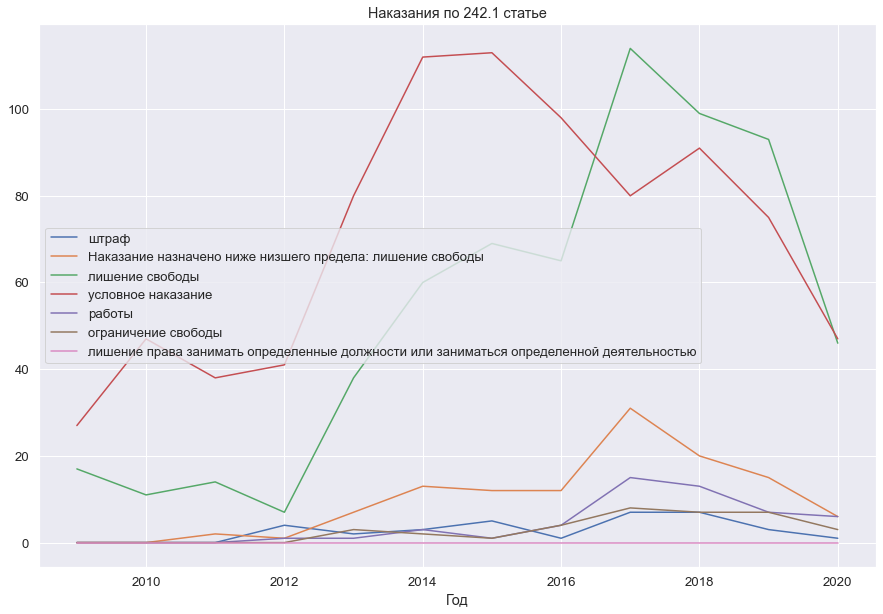

In [110]:
type_of_convicted(punishments_242_1).plot(figsize=(15, 10))
plt.title('Наказания по 242.1 статье')
plt.show();

### 242.2 УК. Изготовление и оборот материалов или предметов с порнографическими изображениями несовершеннолетних

In [93]:
punishments_242_2 = get_article_punishments('242.2')
outcome_242_2 = sum_of_punishment(punishments_242_2)
outcome_242_2

,Всего осуждено (для проверки),осуждено,оправдано,освобождено от наказания,принудительные меры,судебное производство прекращено
Год,,,,,,
2012,0,0.0,0,0.0,0.0,0.0
2013,2,3.0,0,0.0,0.0,0.0
2014,4,4.0,0,0.0,0.0,0.0
2015,7,7.0,0,0.0,0.0,0.0
2016,6,6.0,0,0.0,0.0,0.0
2017,13,16.0,0,0.0,0.0,0.0
2018,12,13.0,1,0.0,0.0,0.0
2019,20,25.0,0,0.0,0.0,0.0
2020,15,18.0,0,0.0,3.0,0.0


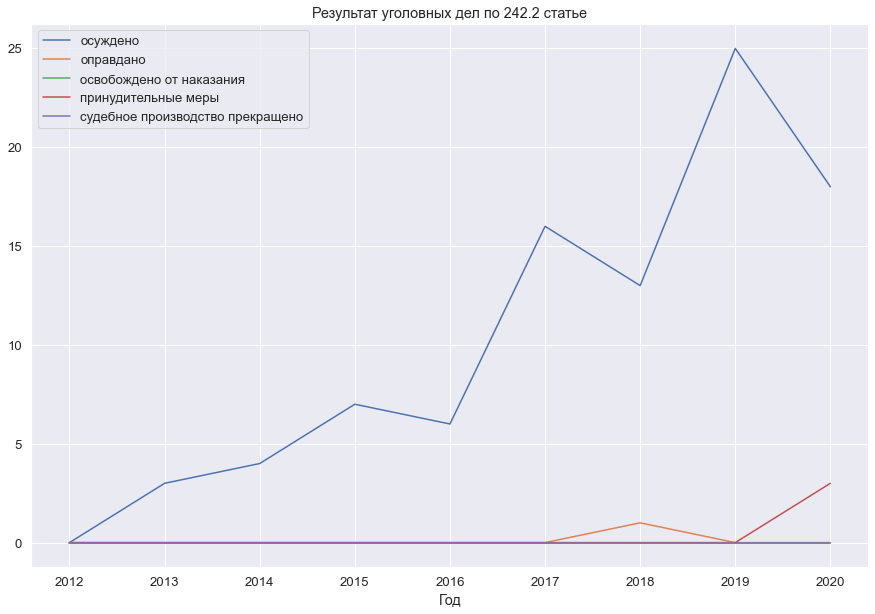

In [106]:
outcome_242_2.iloc[:, 1:].plot(figsize=(15, 10)) #.iloc[:, 1:]
plt.title('Результат уголовных дел по 242.2 статье')
plt.show();

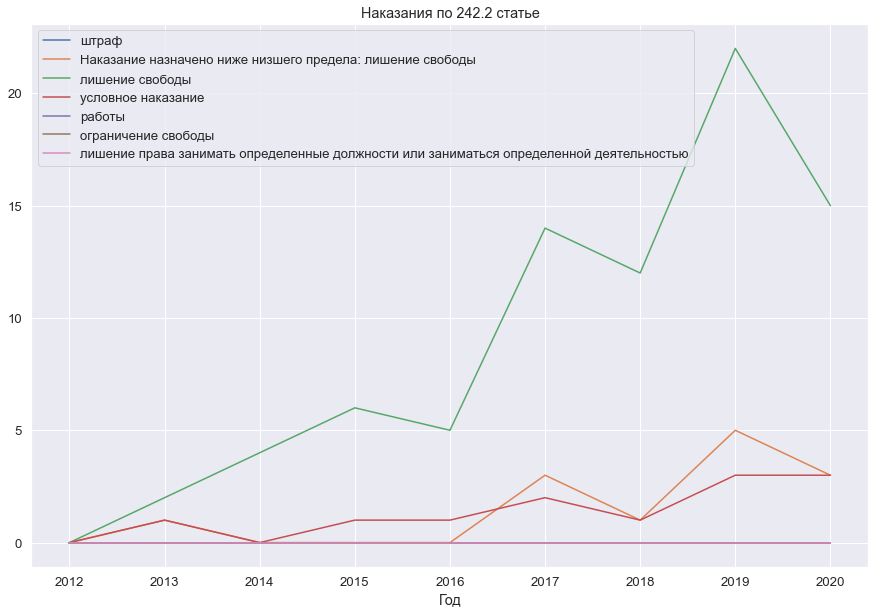

In [109]:
type_of_convicted(punishments_242_2).plot(figsize=(15, 10))
plt.title('Наказания по 242.2 статье')
plt.show();

### По всем статьям

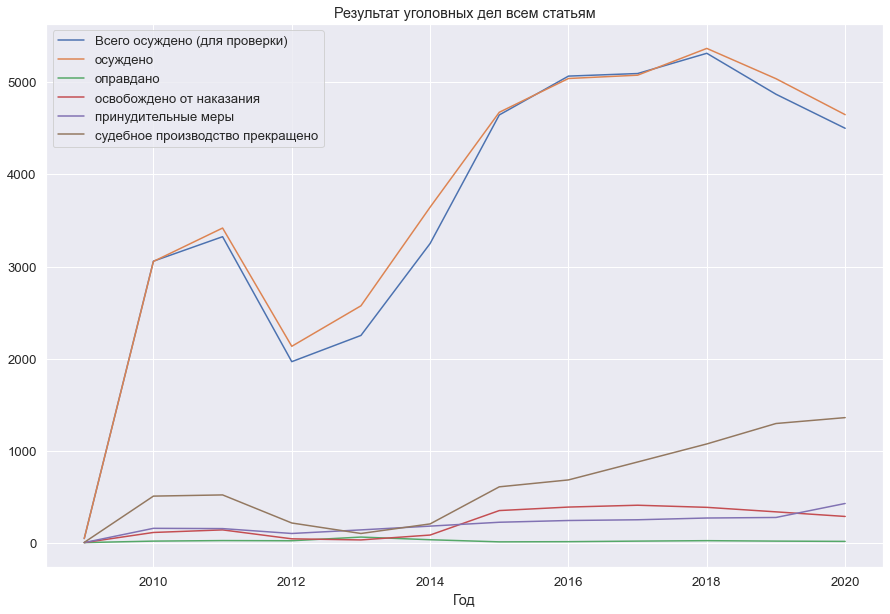

In [107]:
sum_of_punishment(punishments.groupby('Год').sum()).plot(figsize=(15, 10))
plt.title('Результат уголовных дел всем статьям')
plt.show();

In [55]:
pd.DataFrame(sum_of_punishment(punishments.groupby('Год').sum()).sum())

,0
Всего осуждено (для проверки),43397.0
осуждено,44727.0
оправдано,233.0
освобождено от наказания,2541.0
принудительные меры,2397.0
судебное производство прекращено,7427.0


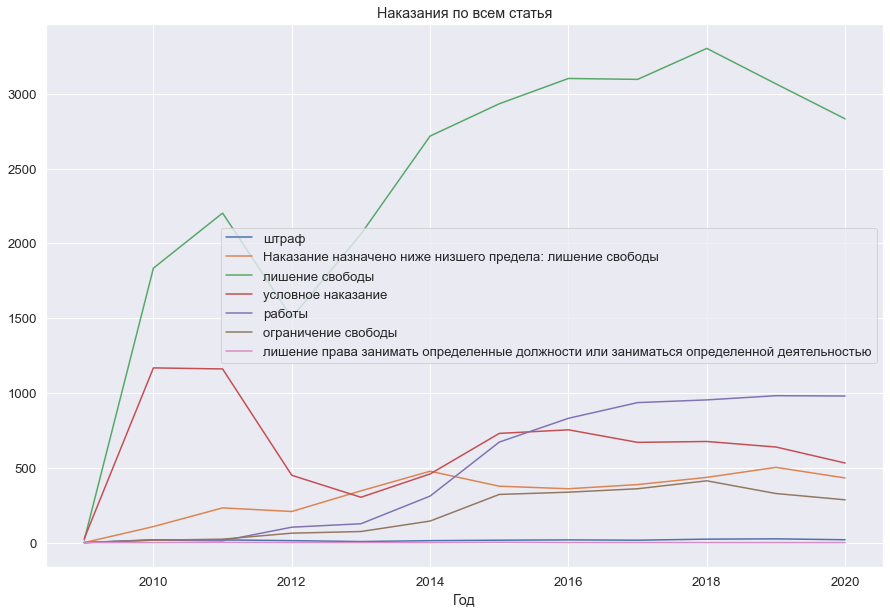

In [108]:
type_of_convicted(punishments.groupby('Год').sum()).plot(figsize=(15, 10));
plt.title('Наказания по всем статья')
plt.show();